# Wczytanie danych i potrzebnych bibliotek

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
titanic_df = pd.read_csv('/content/drive/MyDrive/ML_kurs/Data/titanic.csv', index_col='PassengerId')

# Analiza aktualnych danych, wyświetlanie wierszy, informacji o całym datasecie, wyświetlenie rozkładów oraz zależności między zmiennymi


In [141]:
print(titanic_df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

Wyświetlenie kilku pierwszych wierszy w celu zapoznania się ze strukturą danych

In [142]:
titanic_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,793.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,33.123938,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,51.578312,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.925000,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.500000,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


Wyświetlenie podstawowych informacji np. czy informacje w danej kolumnie się powtarzają, liczba unikalnych wartości, średnia, wartości maksymalne i minimalne.

In [143]:
titanic_df.isna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [144]:
for column in titanic_df.columns:
  print(column, titanic_df[column].isna().sum())

Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 98
Cabin 687
Embarked 2


Znalezienie liczby brakujących wartości w zestawie danych dla poszczególnych kolumn.

In [145]:
def plot_histogram(df, column):
  data = df[column].dropna()

  plt.hist(data, bins=30, edgecolor='black')
  plt.title(f"Rozkład kolumny {column}")
  plt.xlabel(column)
  plt.ylabel('częstotliwosć')
  plt.show()

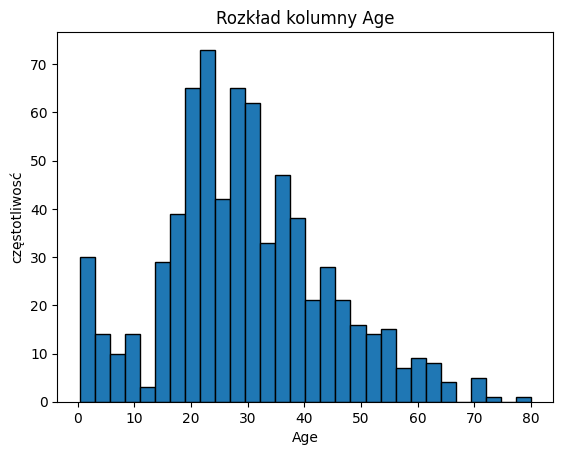

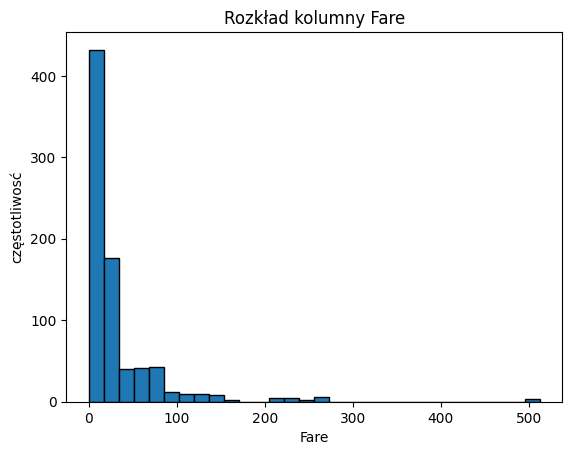

In [146]:
plot_histogram(titanic_df, 'Age')
plot_histogram(titanic_df, 'Fare')

Rozkłady kolumn numerycznych

In [147]:
def plot_categorical(df, column):
  counts = df[column].value_counts()

  counts.plot(kind='bar', edgecolor='black')
  plt.title(f'Rozkład kolumny {column}')
  plt.xlabel(column)
  plt.ylabel('Liczba wystąpień')
  plt.show()

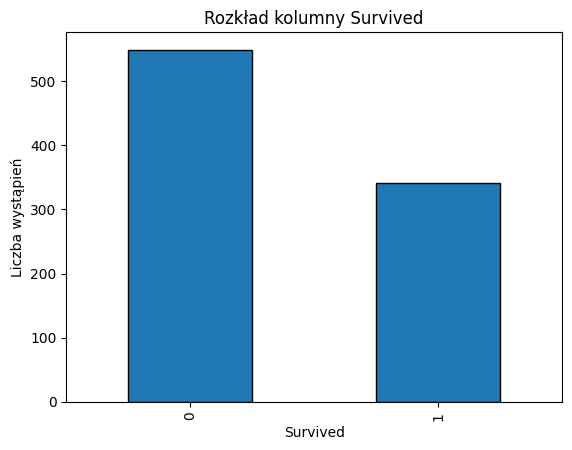

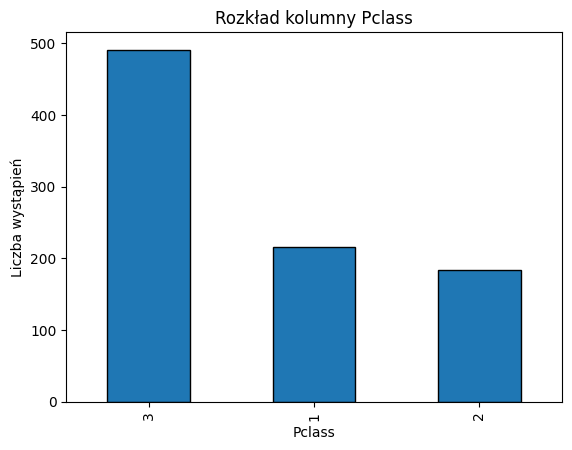

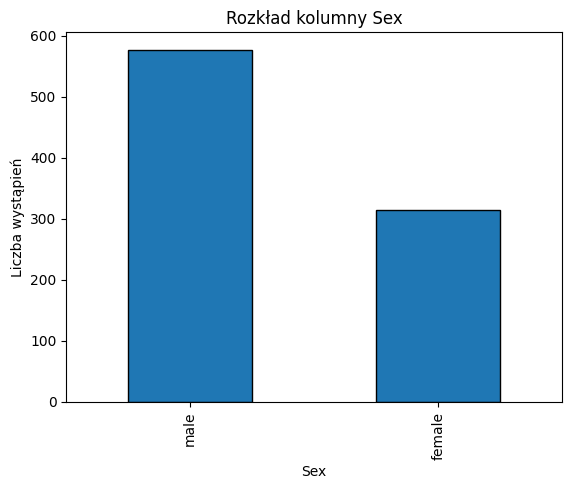

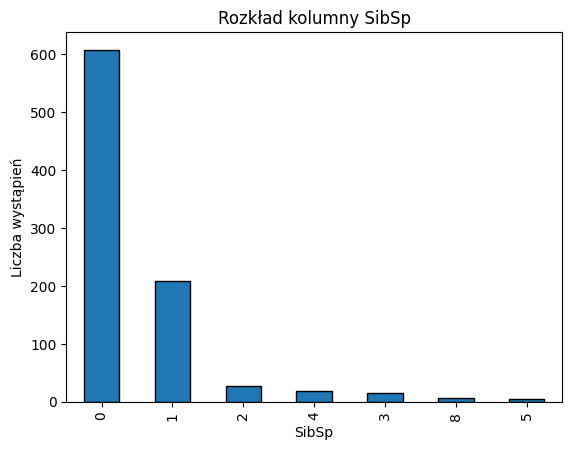

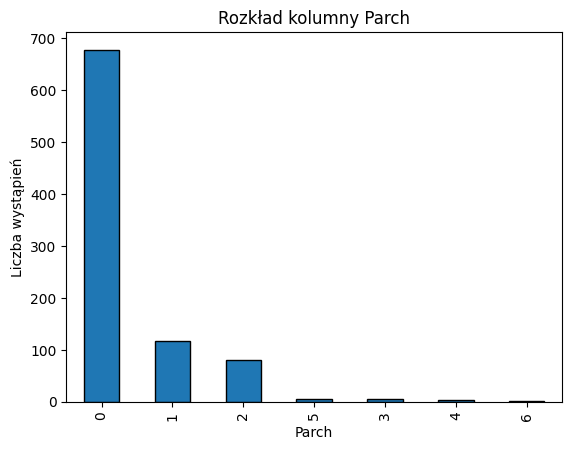

In [148]:
plot_categorical(titanic_df, 'Survived')
plot_categorical(titanic_df, 'Pclass')
plot_categorical(titanic_df, 'Sex')
plot_categorical(titanic_df, 'SibSp')
plot_categorical(titanic_df, 'Parch')

Rozkłady kolumn kategorialnych


In [174]:
def boxplot(df, x_column, y_column):
  sns.boxplot(data=df, x=df[x_column], y=df[y_column], hue=df['Sex'])
  plt. title(f'Zależność {y_column} od {x_column}')
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.show()

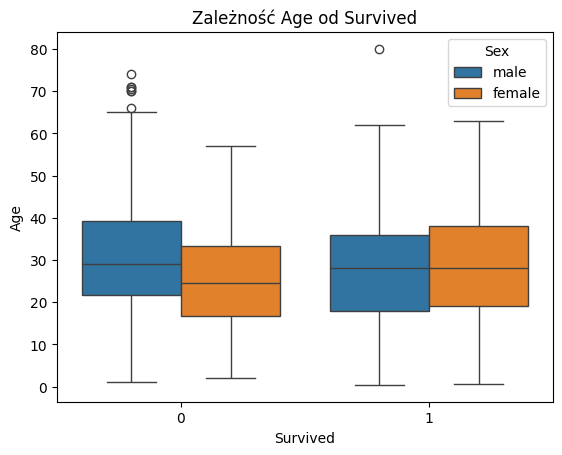

In [175]:
boxplot(titanic_df, 'Survived', 'Age')

Zależność Wieku od liczby przeżyć podzielona na płcie. Można zauważyć, że młodsi mężczyźni mieli większą szansę na przeżycie, kobiety w większej części przeżyły oraz dziewczynki miały dużą szansę na przeżycie zgodnie z zasadą dzieci i kobiety były pierwsze do ratowania.

In [172]:
def survival_by(x, y):
  survival_counts = titanic_df.groupby([y, x]).size().reset_index(name='count')
  palette = {0: '#d62728', 1: '#2ca02c'}
  plt.figure(figsize=(6,4))
  sns.barplot(
      data=survival_counts,
      x=y,
      y='count',
      hue=x,
      palette=palette
  )

  plt.title(f'Przeżycia według {y}')
  plt.xlabel(y)
  plt.ylabel('Liczba pasażerów')
  plt.show()


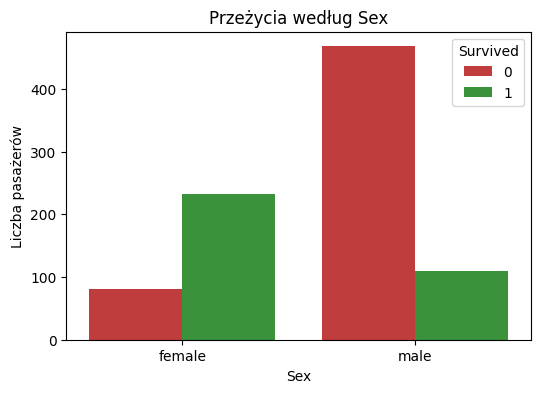

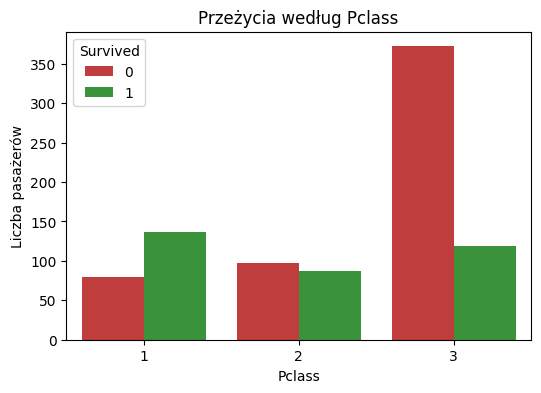

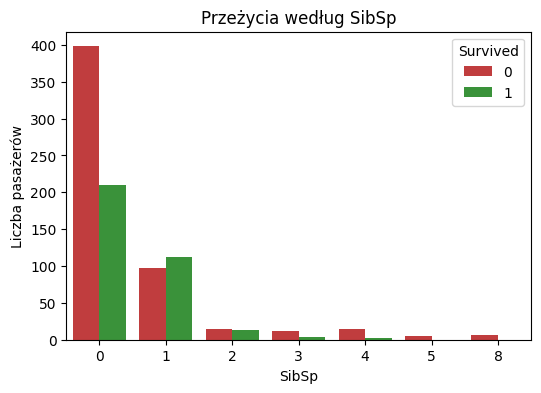

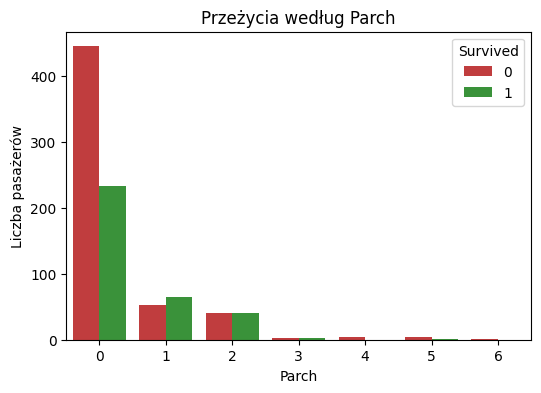

In [173]:
survival_by('Survived', 'Sex')
survival_by('Survived', 'Pclass')
survival_by('Survived', 'SibSp')
survival_by('Survived', 'Parch')

Zależności przeżycia od różnych cech.

In [176]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 1, 'female': 0})
titanic_df = titanic_df.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Fare'], axis='columns')


Kodowanie binarne płci, oraz wyrzucenie kolumn, które nie niosą wartościowych informacji do analizy.

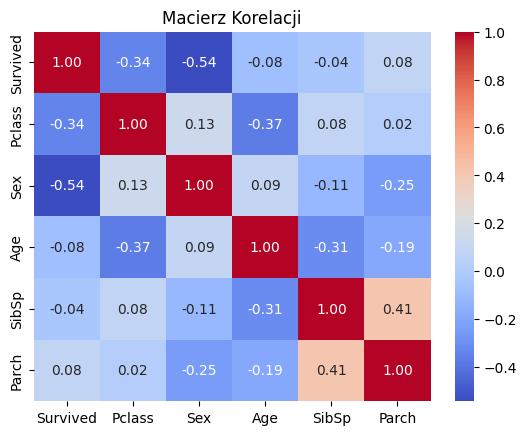

In [178]:
corr = titanic_df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Macierz Korelacji')
plt.show()

Z macierzy korelacji można wyczytać, że najbardziej na przeżycie miała wpływ płeć (kobiety miały większą szansę na przeżycie) oraz Klasa podróży miała znaczenie - im wyższa klasa, tym większe szanse na przeżycie.

# Uzupełnianie wartości brakujących


In [179]:
def column_distribution(df, column):
  return df[column].value_counts(normalize=True)

In [180]:
age_count_prob = column_distribution(titanic_df, 'Age')
age_count_prob

,proportion
Age,
24.00,0.042017
22.00,0.037815
18.00,0.036415
28.00,0.035014
30.00,0.035014
...,...
24.50,0.001401
0.67,0.001401
0.42,0.001401


In [184]:
age_values = age_count_prob.index
age_probs = age_count_prob.values

In [182]:
missing_age = titanic_df.Age.isna()

In [185]:
titanic_df.loc[missing_age, 'Age'] = np.random.choice(age_values, size=missing_age.sum(), p=age_probs)
column_distribution(titanic_df, 'Age')

,proportion
Age,
18.00,0.040404
24.00,0.039282
22.00,0.038159
28.00,0.037037
21.00,0.034792
...,...
53.00,0.001122
24.50,0.001122
0.67,0.001122


In [186]:
titanic_df.Age.isna().sum()

np.int64(0)

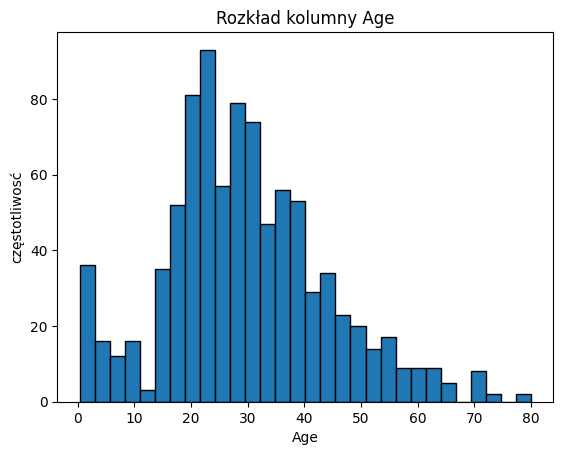

In [187]:
plot_histogram(titanic_df, 'Age')

Uzupełnianie wartości na podstawie rozkładu wieku w kolumnie.

# Dodanie kolumn, które stanowią wartościową informację


In [214]:
titanic_df['IsChild'] = (titanic_df['Age'] < 16).astype(int)
titanic_df['IsAlone'] = ((titanic_df['IsChild'] == 0) & ((titanic_df['SibSp'] + titanic_df['Parch']) == 0)).astype(int)

In [210]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,IsChild,IsAlone
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,0,0
2,1,1,0,38.0,1,0,0,0
3,1,3,0,26.0,0,0,0,1
4,1,1,0,35.0,1,0,0,0
5,0,3,1,35.0,0,0,0,1
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,0,1
888,1,1,0,19.0,0,0,0,1
889,0,3,0,23.5,1,2,0,0


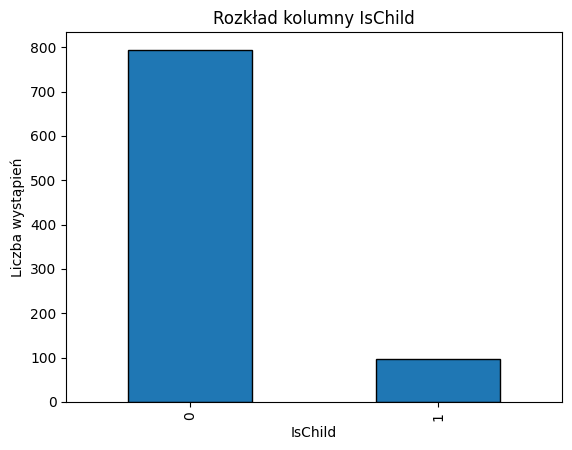

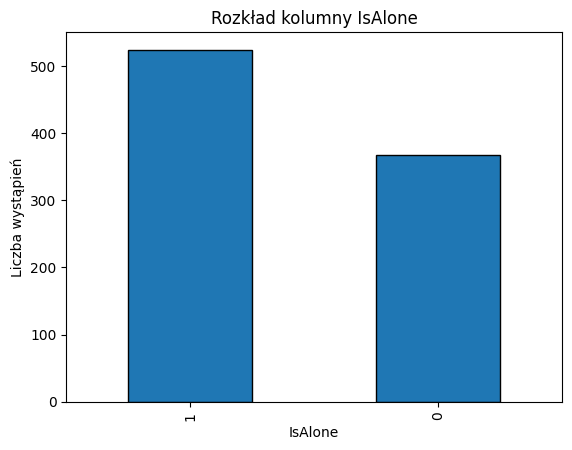

In [215]:
plot_categorical(titanic_df, 'IsChild')
plot_categorical(titanic_df, 'IsAlone')

Zbadanie liczności osób w nowych kolumnach

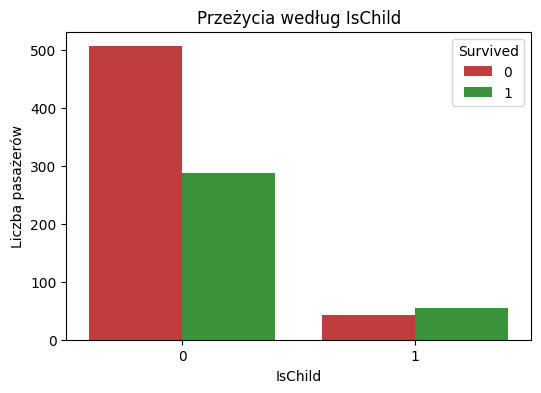

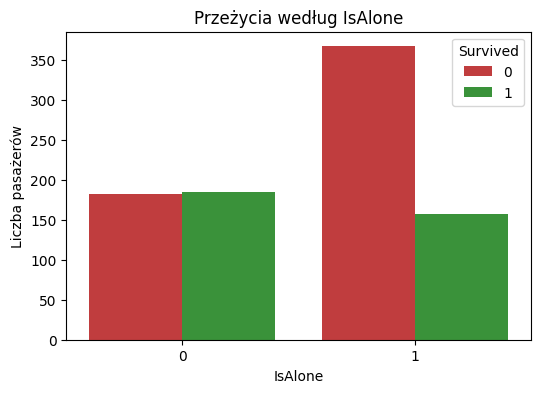

In [216]:
survival_by('Survived', 'IsChild')
survival_by('Survived', 'IsAlone')

Na powyższych wykresach widać, że statystycznie dzieci przeżywały w większej części niż dorośli oraz osoby, które miały ze sobą bliskich

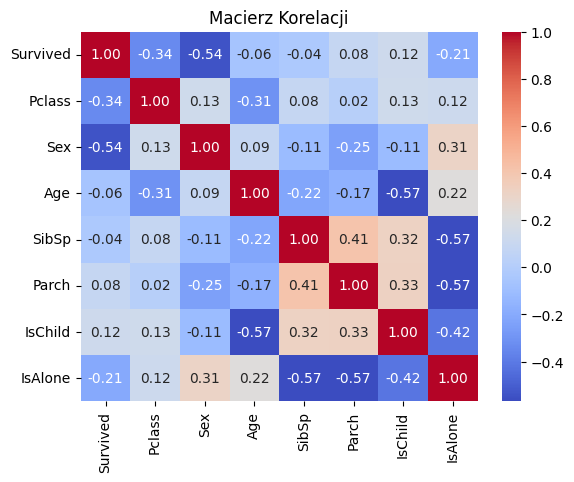

In [217]:
corr = titanic_df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Macierz Korelacji')
plt.show()

Macierz korelacji pokazuje, że faktycznie to, czy jesteś dzieckiem poniżej 16 roku życia ma wpływ na przeżycie oraz to czy podróżujesz samemu czy z rodziną również ma wpływ na przeżycie na korzyść podrużujących z bliskimi.
